In [39]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [23]:

def prepare_country_states(oecd_bill, gdp_per_capita):
    oecd_bill = oecd_bill[oecd_bill['INEQUALITY']=='TOT']
    
    oecd_bill = oecd_bill.pivot(index='Country' , columns = 'Indicator' , values = 'Value')
    
    gdp_per_capita.rename(columns = {'2015': 'GDP Per Capita'},inplace = True)
    gdp_per_capita.set_index('Country', inplace =True)
    
    full_country_stats = pd.merge(left=oecd_bill,right=gdp_per_capita,left_index=True,right_index=True)
    
    full_country_stats.sort_values(by='GDP Per Capita', inplace=True)
    
    remove_indices = [0 , 1 , 6 , 8 , 33 , 34 , 35]
    
    keep_indices = list(set(range(36))-set(remove_indices))
    
    return full_country_stats[['GDP Per Capita','Life satisfaction']].iloc[keep_indices]

In [24]:
datapath = r'C:\Users\ASUS\Hands On Machine Learning With Scikit Learn Keras ans Tensorflow\datasets\lifesat'
oecd_bli = pd.read_csv(r'C:\Users\ASUS\Hands On Machine Learning With Scikit Learn Keras ans Tensorflow\datasets\lifesat\oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv(r'C:\Users\ASUS\Hands On Machine Learning With Scikit Learn Keras ans Tensorflow\datasets\lifesat\gdp_per_capita.csv',thousands=',',delimiter='\t' , encoding='latin1' , na_values="n/a")

In [25]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [26]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [27]:
# Prepare the data

country_stats = prepare_country_states(oecd_bli,gdp_per_capita)

In [28]:
country_stats.head()

,GDP Per Capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [30]:
country_stats.shape

(29, 2)

In [31]:
X = np.c_[country_stats['GDP Per Capita']]
y = np.c_[country_stats['Life satisfaction']]

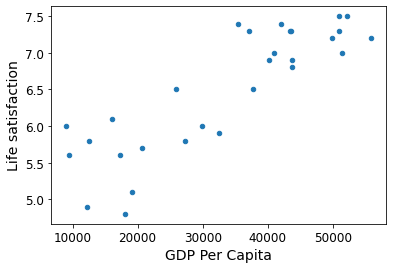

In [36]:
# visualize the data
country_stats.plot(kind='scatter',x="GDP Per Capita",y = 'Life satisfaction')
plt.show()

In [40]:
model = sklearn.linear_model.LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

#print("Accuracy score :",accuracy_score(y_test,y_pred))
print("R2 score :",r2_score(y_test,y_pred))
print("Mean Squared Error :" , mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :" , np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score : 0.5550075927561793
Mean Squared Error : 0.30006771955132705
Root Mean Squared Error : 0.5477843732266621


In [46]:
X_new = [[22587]]
print(model.predict(X_new))

[[5.90597998]]


In [47]:
model.coef_

array([[4.91414833e-05]])

In [51]:
model.score(X_train,y_train)

0.7868319418683312

In [52]:
model.intercept_

array([4.7960213])

In [56]:
new_data = 22587
coef = 4.91414833e-05
intercept = 4.7960213
answer = coef * new_data + intercept
answer

5.905979983297099

In [62]:
def plot_data(X_test,y_test,y_pred):
    plt.scatter(X_test,y_test,color='black')
    plt.plot(X_test,y_pred,color='blue',linewidth=3)
    plt.show()

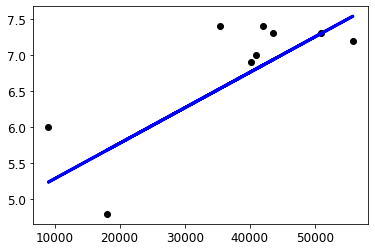

In [63]:
plot_data(X_test,y_test,y_pred)

In [64]:
# Replacing the Linear Regression model with k-Nearest Neighbors(k=3)

import sklearn.neighbors
KNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

KNN.fit(X_train,y_train)

knn_pred = KNN.predict(X_test)

knn_pred

array([[7.23333333],
       [5.43333333],
       [7.03333333],
       [7.        ],
       [6.56666667],
       [5.6       ],
       [7.33333333],
       [7.        ],
       [7.        ]])

In [65]:
KNN.predict(X_new)

array([[5.76666667]])

In [66]:
KNN.n_neighbors

3

In [69]:
KNN.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(n_neighbors=3)>

In [ ]:
0